<div align="center">

<h2 style=""> 
  CP321A - Data Visualization <br>
  Course Project
</h2>

<h3> <u> How do education levels affect wages in Canada? </u> </h3>

</div>

### Introduction

This project investigates the relationship between education attainment and wage levels across different age groups and sexes. The purpose is to determine whether higher education correlates with increased earnings among the various demographic groups. By employing detailed data visualization techniques, this study will illustrate the potential economic impacts of educational qualifcations and provide a comprehensive understanding of how education may influence income disparties in diverse populations.

In [220]:
'''
   @Desc: Load the necessary libraries
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
'''
   @Desc: Load the data from the csv file (stored in Git LFS)
'''
df = pd.read_csv('./data/wages_by_education.csv')

'''
    @Desc: Display the first few rows of the data for sample
'''
df.head()

,_id,YEAR,Geography,Type of work,Wages,Education level,Age group,Both Sexes,Male,Female
0,1,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",15 years and over,11364.5,5954.5,5410.0
1,2,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",15-24 years,1877.8,983.1,894.7
2,3,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",20-34 years,4274.9,2244.3,2030.6
3,4,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",25 years and over,9486.7,4971.4,4515.3
4,5,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",25-34 years,3047.9,1602.2,1445.7


### Data set description

> The data set was retrived from the Ontario Data Catalogue, found [here](https://data.ontario.ca/dataset/wages-by-education-level/resource/7b325fa1-e9d6-4329-a501-08cdc22a79df)

This data set provides a comprehensive overview of wages segmented by various demographic and socioeconomic categories across different provinces in Canada and time periods. Each entry in the data set is detailed with the following columns:

<ul>
    <li><strong>Year:</strong> 
        <ul>
            <li> The year in which the data was recorded, allowing for trend analysis over time </li>
            <li> Data includes years 1997 - 2020 </li>
        </ul>
    </li>
    <li><strong>Geography:</strong> 
        <ul>
            <li> The provinces in Canada where the data was collected, highlighting any geographic disparities </li>
            <li> Some data may be generalized to the entirety of Canada </li>
        </ul>
    </li>
    <li><strong>Type of Work:</strong>
        <ul>
            <li> Classification of work type, which can vary widely in terms of industry and role specificity </li>
        </ul>
    </li>
    <li><strong>Wages:</strong> 
        <ul>
            <li> The compensation received by individuals, split by various factors </li>
        </ul>
    </li>
    <li><strong>Education Level:</strong> 
        <ul>
            <li> The highest level of education attained by individuals </li>
        </ul>
    </li>
    <li><strong>Age Group:</strong> 
        <ul>
            <li> Categorization of individuals by age, providing information into wage variations across different age groups </li>
        </ul>
    </li>
    <li><strong>Both Sexes:</strong> 
        <ul>
            <li> The combined total of male and female employees, focusing on overall employment trends rather than gender-specific disparities </li>
        </ul>
    </li>
    <li><strong>Male:</strong> 
        <ul> 
            <li> Data specifically relating to male employees (not relevant for our study) </li>
        </ul>
    </li>
    <li><strong>Female:</strong> 
        <ul>
            <li> Data specifically relating to female employees (not relevant for our study) </li>
        </ul>
    </li>
</ul>

#### Focus of Analysis 
For the purpose of this analysis, the focus will be primarily on the combined data for "Both Sexes", allowing us to examine trends and patterns in employment and wages without showing the disparity between male and female employees - which can be analyzed at a later date. By analyzing data in this way, we aim to provide a broader understanding of the overall employment across different educational backgrounds, highlighting how education influences wage outcomes across the general population.


#### Verification of Valid Data
Below, we will be showing that the data used is correctly formatted, as well as, checking for missing values and any duplicated infrormation. By doing these steps, we will ensure that our data is relevant and allows for a more accurate analysis of the question at hand.

In [222]:
'''
    @Desc: Display the shape of the data, showcasing the number of rows and columns
'''
df.shape

(425040, 10)

In [223]:
'''
    @Desc: Display the data types of the columns
'''
df.describe()

,_id,YEAR,Both Sexes,Male,Female
count,425040.000000,425040.000000,425040.000000,425040.000000,425040.000000
mean,212520.500000,2008.000000,281.968049,271.540792,224.783368
std,122698.623546,6.633257,480.788912,415.794503,335.897431
min,1.000000,1997.000000,0.000000,0.000000,0.000000
25%,106260.750000,2002.000000,14.960000,11.780000,12.200000
50%,212520.500000,2008.000000,28.850000,24.425000,23.630000
75%,318780.250000,2014.000000,482.790000,488.922500,391.785000
max,425040.000000,2019.000000,16153.000000,8166.900000,7986.100000


In [224]:
'''
    @Desc: Checking for missing values in the data
'''
df.isnull().sum()

_id                0
YEAR               0
Geography          0
Type of work       0
Wages              0
Education level    0
Age group          0
Both Sexes         0
Male               0
Female             0
dtype: int64

In [225]:
'''
    @Desc: Checking for duplicate values in the data
'''
df.duplicated().sum()

0

In [226]:
'''
    @Desc: Dropping any possible duplicate values in the data
'''
df = df.drop_duplicates()

In [227]:
'''
    @Desc: Getting the columns of the data
'''
df.columns

Index(['_id', 'YEAR', 'Geography', 'Type of work', 'Wages', 'Education level',
       'Age group', 'Both Sexes', 'Male', 'Female'],
      dtype='object')

In [228]:
df['Education level'].unique()

array(['Total, all education levels', '   0 - 8  years',
       '   Some high school', '   High school graduate',
       '   Some post-secondary',
       '   Post-secondary certificate or diploma',
       '    Trade certificate or diploma', '    Community college, CEGEP',
       '    University certificate below bachelors degree',
       '   University degree', "      Bachelor's degree",
       "      Above bachelor's degree", 'PSE  (5,6,7,8,9))',
       'No PSE  (0,1,2,3,4)'], dtype=object)

#### Figure 1. Graph showing the increase of total employees from 1997 - 2020

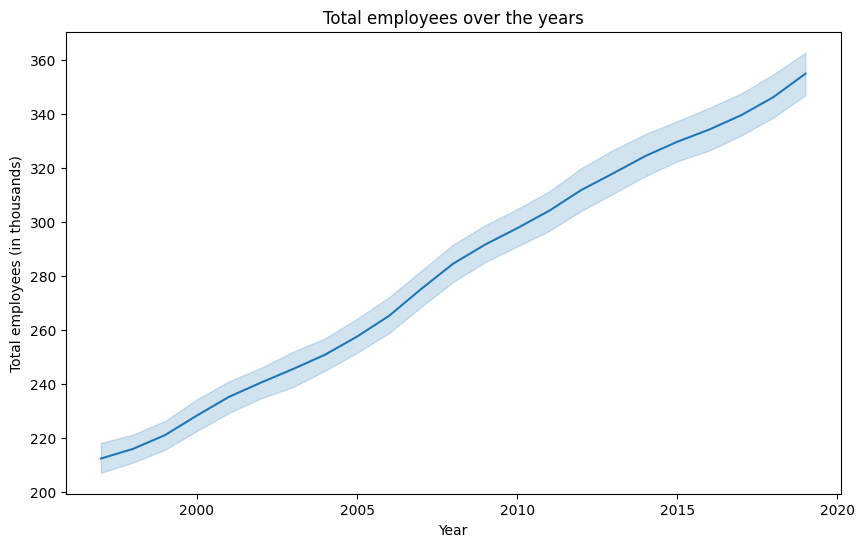

In [229]:
plt.figure(figsize=(10, 6))
plt.title('Total employees over the years')
sns.lineplot(data=df, x='YEAR', y='Both Sexes')
plt.xlabel('Year')
plt.ylabel('Total employees (in thousands)')
plt.show()

#### Figure 2. Graph showing the increase of employees by education level from 1997 - 2020

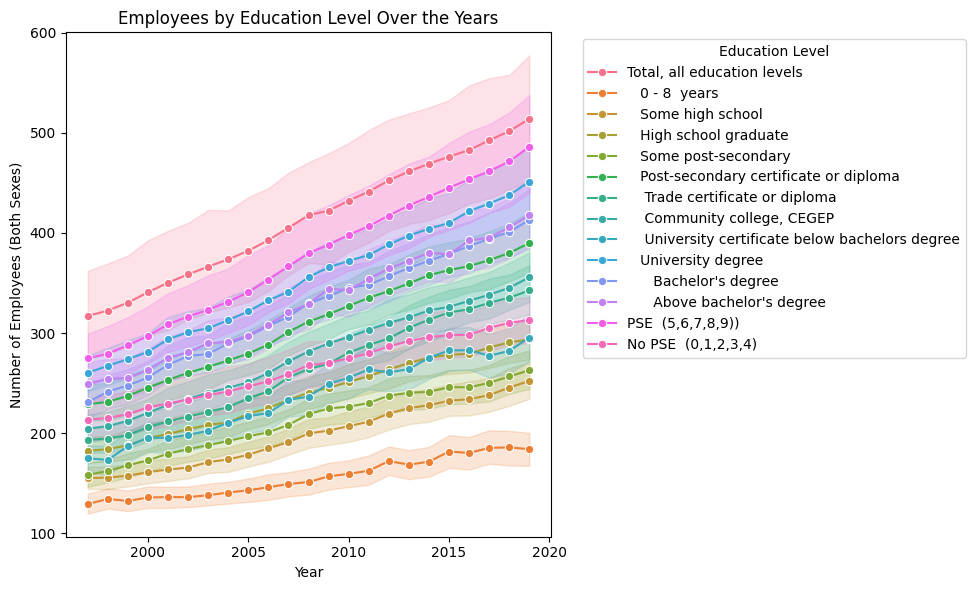

In [230]:
plt.figure(figsize=(10, 6))
plt.title('Employees by Education Level Over the Years')
sns.lineplot(data=df, x='YEAR', y='Both Sexes', hue='Education level', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Employees (Both Sexes)')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()